In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img = cv2.imread("../marsface.jpg")

In [3]:
img.shape

(226, 223, 3)

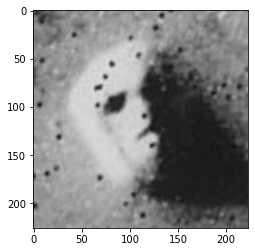

In [5]:
plt.imshow(img)

In [7]:
# Canny edge detection
canny = cv2.Canny(img, 50, 100)

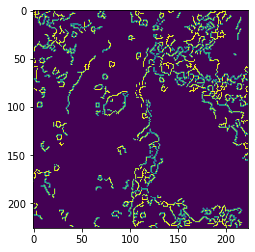

In [8]:
plt.imshow(canny)

In [9]:
# laplacian filter
lapl = cv2.Laplacian(img, cv2.CV_64F)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


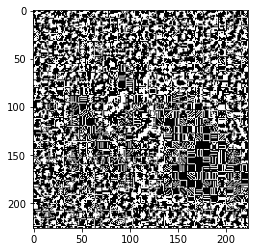

In [10]:
plt.imshow(lapl)

In [11]:
np.shape(lapl), np.shape(canny)

((226, 223, 3), (226, 223))

In [12]:
np.mean(lapl), np.mean(canny)

(-0.0013294178340410333, 22.536013333862456)

In [13]:
np.var(lapl), np.var(canny)

(58.33776957278075, 5238.8115031509)

In [14]:
# Instantiate our feature detector
kaze = cv2.KAZE_create()

In [15]:
# Detect the keypoints.
keypoints = kaze.detect(img)

In [16]:
points = [(keypoint.pt[0], keypoint.pt[1]) for keypoint in keypoints]
points

[(8.247653007507324, 10.861433029174805),
 (126.939697265625, 17.992855072021484),
 (42.32424545288086, 25.39869499206543),
 (101.04295349121094, 28.467409133911133),
 (152.50289916992188, 40.80393981933594),
 (109.13185119628906, 46.42543029785156),
 (8.999445915222168, 51.89975357055664),
 (122.3423080444336, 53.54324722290039),
 (81.46143341064453, 55.52069854736328),
 (74.72672271728516, 68.69676208496094),
 (197.72573852539062, 77.57910919189453),
 (214.065673828125, 79.12784576416016),
 (67.45411682128906, 79.89483642578125),
 (182.95594787597656, 80.79434204101562),
 (113.53937530517578, 83.4290542602539),
 (187.3056640625, 85.18402862548828),
 (91.96963500976562, 89.1258544921875),
 (201.97885131835938, 89.9380874633789),
 (80.86901092529297, 91.89856719970703),
 (72.39913940429688, 93.20674133300781),
 (6.272116661071777, 97.71817779541016),
 (66.4031982421875, 98.1861572265625),
 (76.30817413330078, 100.36019134521484),
 (114.82769012451172, 109.38587188720703),
 (26.06525230

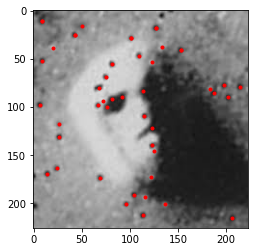

In [59]:
# Plot the keypoints coordinates over the image.
plt.imshow(img)
for i in range(len(keypoints)):
    plt.plot(points[i][0], points[i][1], marker=".", color="r")
plt.show()

In [18]:
# Compute descriptors for these keypoints.
keypoints, des = kaze.compute(img, keypoints)
des.shape, des[1]

((149, 64),
 array([ 0.07776835,  0.07611643,  0.09727361,  0.10668702,  0.01387884,
         0.02272236,  0.05087989,  0.11612563,  0.00183053,  0.02163767,
         0.03509327,  0.05471367,  0.00489376, -0.00601664,  0.0311775 ,
         0.02881683, -0.04196278,  0.08093868,  0.09477173,  0.10825805,
        -0.138391  , -0.08385399,  0.2450372 ,  0.25877067,  0.09692663,
        -0.09813859,  0.31701872,  0.19634598, -0.06342683, -0.07999323,
         0.18596607,  0.16196792, -0.07847063,  0.04197139,  0.07922392,
         0.06128414, -0.13164188,  0.22137885,  0.19627944,  0.26429513,
         0.00208909,  0.11741395,  0.23661149,  0.2039796 , -0.14967065,
        -0.01079718,  0.27228582,  0.21510245, -0.00288214, -0.03825793,
         0.0519668 ,  0.07433438, -0.03161305, -0.0480347 ,  0.06235652,
         0.08851965, -0.02290913, -0.00955571,  0.07362897,  0.06800184,
        -0.12521918, -0.07914729,  0.14201327,  0.08929136], dtype=float32))

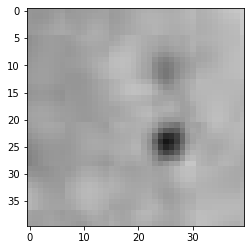

In [19]:
# Selecting an image ROI
# Pick a point
point = (127, 21)
r = 20
# Look at the surrounding pixels in a radius
pointROI = img[point[0] - r : point[0]+ r, point[1] - r : point[1] + r]
plt.imshow(pointROI)

In [53]:
# Try the same thing with a dusty image.
dusty = cv2.imread("../dusty.jpg")

In [54]:
keypoints = kaze.detect(dusty)
keypoints

[]

In [57]:
#  Nothing fram KAZE. Try ORB.
orb = cv2.ORB_create()
keypoints = orb.detect(dusty)

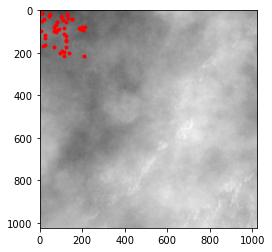

In [58]:
# Plot the keypoints coordinates over the image.
plt.imshow(dusty)
for i in range(len(keypoints)):
    plt.plot(points[i][0], points[i][1], marker=".", color="r")
plt.show()